In [132]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn import cluster

from matplotlib.lines import Line2D
%matplotlib inline

In [133]:
big_playlist_df = pd.read_csv("Big_playlist.csv")
big_playlist_df

,Title,Artist,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,You're The One - Un mal pour un bien,Petula Clark,7dmLg6dYLmjlJXNwFEPQqf,0.4510,0.6700,5,-8.938,0,0.0366,0.651,0.000000,0.6430,0.8710,136.860,145960
1,Doctor My Eyes,Jackson Browne,3QcuZo6WLcFkqqLmDs0d95,0.4800,0.6260,5,-8.406,1,0.0294,0.266,0.000057,0.0857,0.5420,75.630,199907
2,Falling in Love at a Coffee Shop,Landon Pigg,1KHdq8NK9QxnGjdXb55NiG,0.4890,0.5610,4,-7.933,1,0.0274,0.200,0.000046,0.1790,0.2380,83.457,244987
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,40h65HAR8COEoqkMwUUQHu,0.5680,0.6340,4,-12.336,1,0.0282,0.494,0.002810,0.2520,0.8660,142.686,257963
4,Summertime Blues,Eddie Cochran,3oAWTk92mZBxKBOKf8mR5v,0.7140,0.8860,11,-8.629,0,0.0554,0.116,0.184000,0.1800,0.9540,156.351,119360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,Elements (Deluxe),Ludovico Einaudi,5i4zyaQRXAX9oI2C9dmHdB,0.4650,0.0342,2,-28.257,0,0.0401,0.992,0.939000,0.1030,0.0590,152.054,300293
10715,Moon Safari,Air,5tR13oIwi5J3elcTZPTTIU,0.5160,0.7430,2,-8.470,1,0.0292,0.282,0.637000,0.1110,0.2260,109.837,226293
10716,Islands - Essential Einaudi,Ludovico Einaudi,76R8ILULQyyodS91TkAvOf,0.2220,0.0200,9,-27.114,1,0.0464,0.995,0.948000,0.0945,0.1190,85.860,357773
10717,Liquid Mind II: Slow World,Liquid Mind,1GyODtIqjM5AO3z5dEJwRg,0.0576,0.1690,10,-20.216,1,0.0484,0.903,0.966000,0.1170,0.0310,50.838,760053


In [134]:
big_playlist_df = big_playlist_df.drop_duplicates()
big_playlist_df.shape

(10122, 15)

In [135]:
big_playlist_df.dtypes

Title                object
Artist               object
ID                   object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [136]:
X = pd.DataFrame(big_playlist_df)
X = X.drop(["Title", "Artist", "ID"], axis = 1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.4510,0.6700,5,-8.938,0,0.0366,0.651,0.000000,0.6430,0.8710,136.860,145960
1,0.4800,0.6260,5,-8.406,1,0.0294,0.266,0.000057,0.0857,0.5420,75.630,199907
2,0.4890,0.5610,4,-7.933,1,0.0274,0.200,0.000046,0.1790,0.2380,83.457,244987
3,0.5680,0.6340,4,-12.336,1,0.0282,0.494,0.002810,0.2520,0.8660,142.686,257963
4,0.7140,0.8860,11,-8.629,0,0.0554,0.116,0.184000,0.1800,0.9540,156.351,119360
...,...,...,...,...,...,...,...,...,...,...,...,...
10714,0.4650,0.0342,2,-28.257,0,0.0401,0.992,0.939000,0.1030,0.0590,152.054,300293
10715,0.5160,0.7430,2,-8.470,1,0.0292,0.282,0.637000,0.1110,0.2260,109.837,226293
10716,0.2220,0.0200,9,-27.114,1,0.0464,0.995,0.948000,0.0945,0.1190,85.860,357773
10717,0.0576,0.1690,10,-20.216,1,0.0484,0.903,0.966000,0.1170,0.0310,50.838,760053


In [137]:
from sklearn.cluster import KMeans

X_scaled = StandardScaler().fit_transform(X)

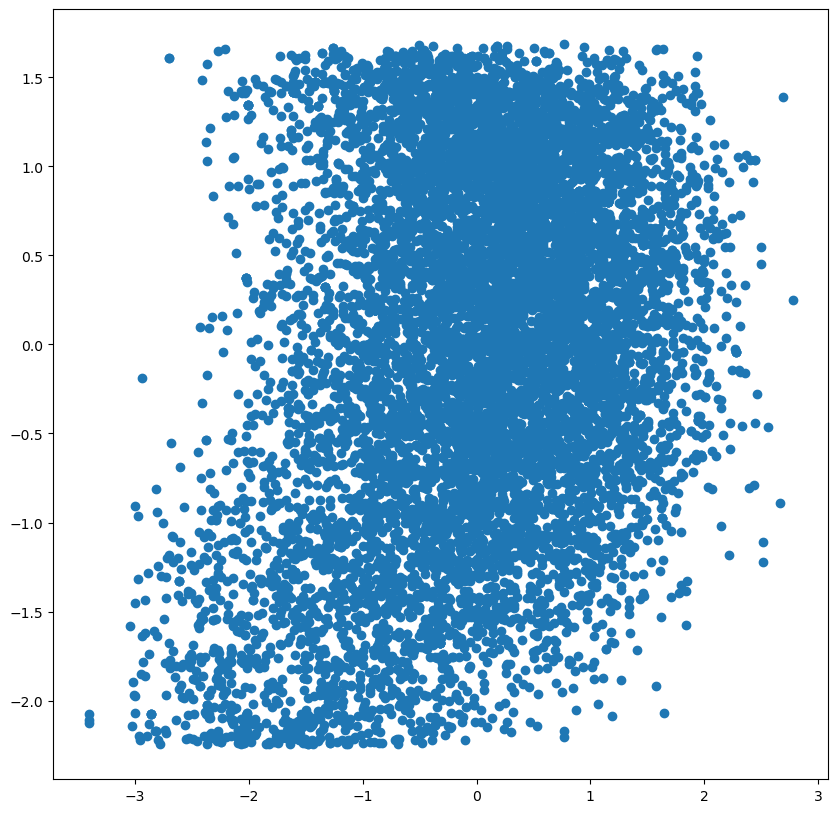

In [138]:
plt.figure(figsize=(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.show()

# Using Elbow and Silhouette method to know k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

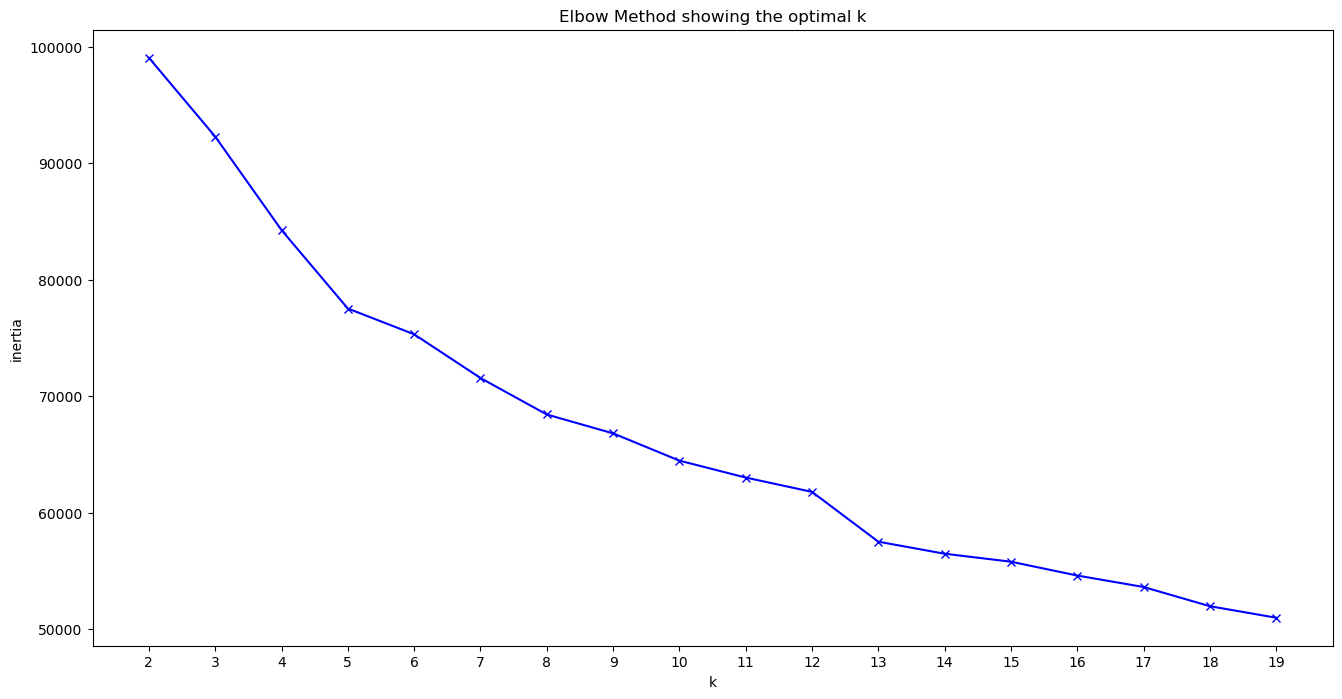

In [139]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters = k,
                    random_state = 1234,
                    n_init = "auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

inertia
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

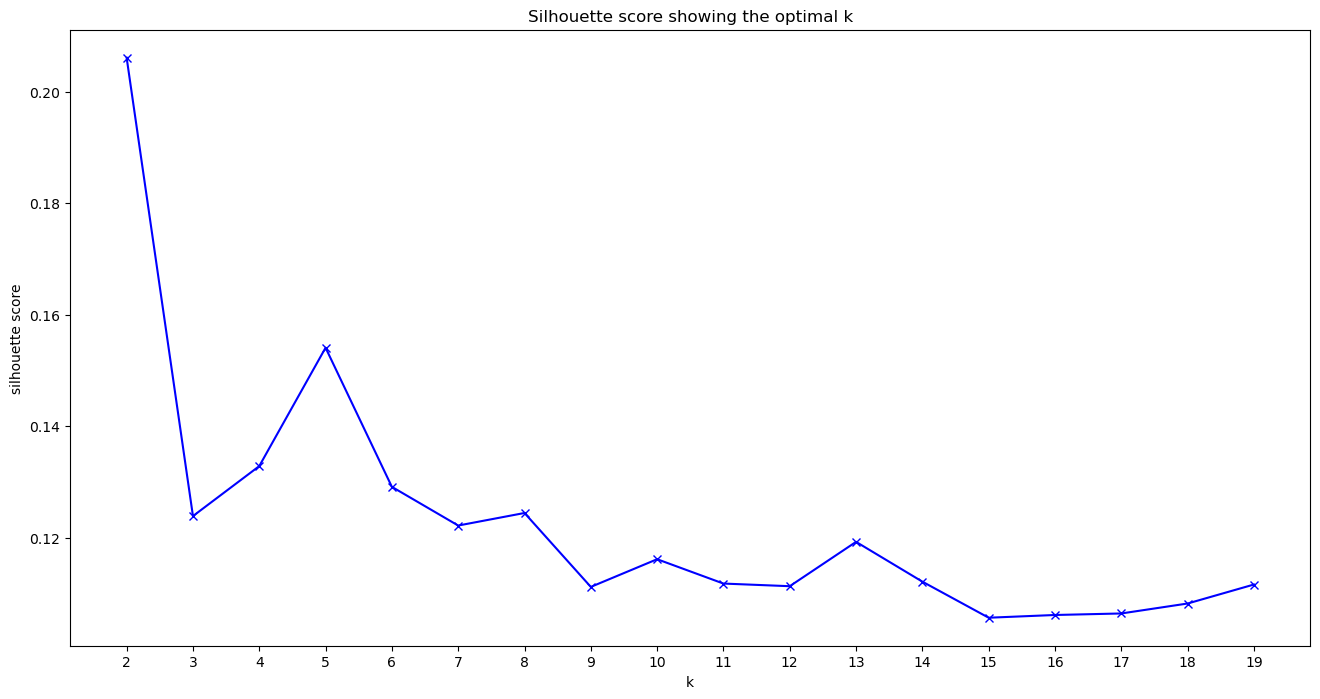

In [140]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    n_init = "auto")
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

# Cluster modeling

Based on the elbow method, I have selected 5 as there is slight angle to it.

In [141]:
kmeans = cluster.KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
clusters_pred = kmeans.predict(X_scaled)

/Users/vrushalikulkarni/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [142]:
# After selecting k = 13, the value_counts of those prediction werent near to even. Hence selecting 5.
pd.Series(clusters_pred).value_counts()

4    4045
3    2498
0    2105
2     791
1     683
dtype: int64

# Creating a dataframe with cluster number

In [143]:
cluster_df = big_playlist_df[["Title", "Artist"]]

In [144]:
cluster_df["Cluster"] = clusters_pred

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_19449/2215536015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["Cluster"] = clusters_pred


In [145]:
cluster_df

,Title,Artist,Cluster
0,You're The One - Un mal pour un bien,Petula Clark,1
1,Doctor My Eyes,Jackson Browne,4
2,Falling in Love at a Coffee Shop,Landon Pigg,3
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,4
4,Summertime Blues,Eddie Cochran,0
...,...,...,...
10714,Elements (Deluxe),Ludovico Einaudi,2
10715,Moon Safari,Air,4
10716,Islands - Essential Einaudi,Ludovico Einaudi,2
10717,Liquid Mind II: Slow World,Liquid Mind,2


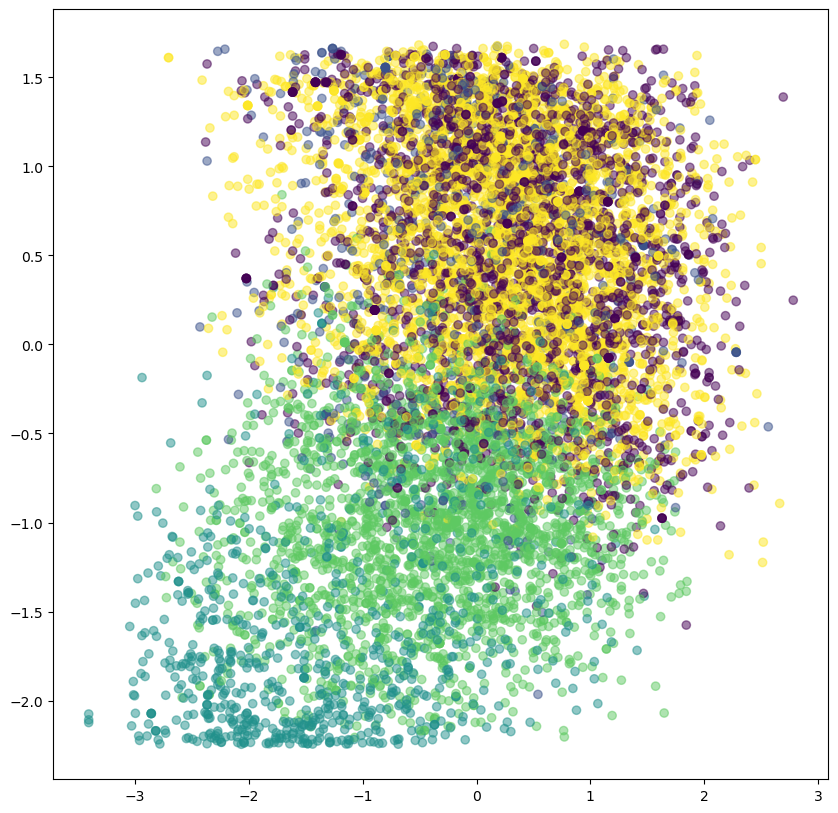

In [146]:
plt.figure(figsize=(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters_pred,alpha = 0.5)
plt.show()


In [147]:
X.head().T

,0,1,2,3,4
danceability,0.4510,0.480000,0.489000,0.56800,0.7140
energy,0.6700,0.626000,0.561000,0.63400,0.8860
key,5.0000,5.000000,4.000000,4.00000,11.0000
loudness,-8.9380,-8.406000,-7.933000,-12.33600,-8.6290
mode,0.0000,1.000000,1.000000,1.00000,0.0000
speechiness,0.0366,0.029400,0.027400,0.02820,0.0554
acousticness,0.6510,0.266000,0.200000,0.49400,0.1160
instrumentalness,0.0000,0.000057,0.000046,0.00281,0.1840
liveness,0.6430,0.085700,0.179000,0.25200,0.1800
valence,0.8710,0.542000,0.238000,0.86600,0.9540


# Agglomerative clusterring

In [148]:
agglomerative = cluster.AgglomerativeClustering(n_clusters = 5,linkage='ward')

In [149]:
agglo_pred = agglomerative.fit_predict(X_scaled)
pd.DataFrame(agglo_pred).value_counts()

0    5000
1    1988
3    1789
4     796
2     549
dtype: int64

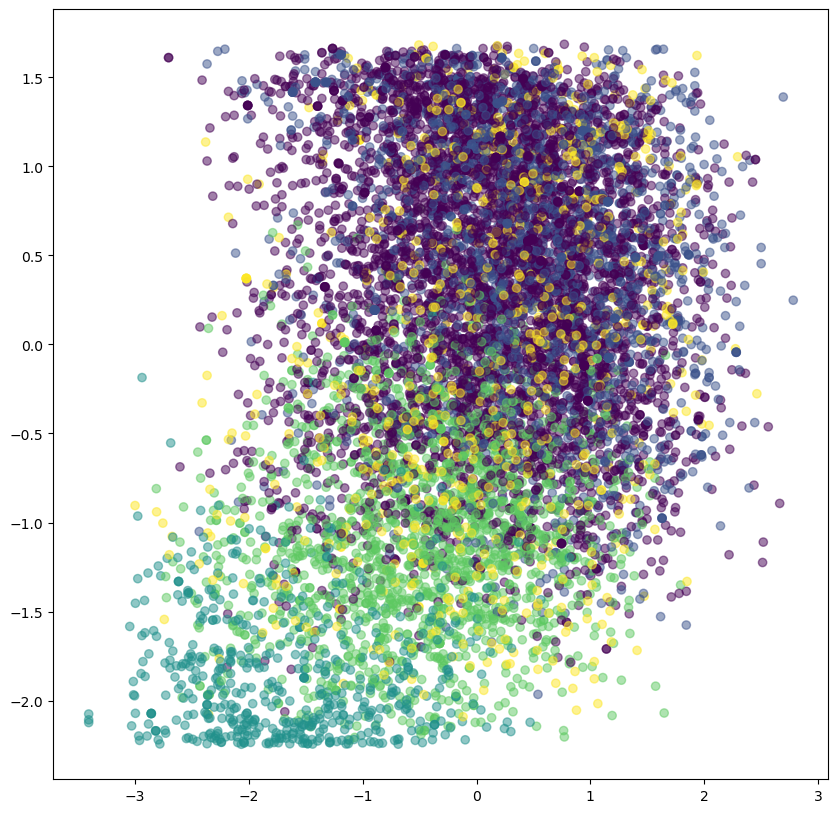

In [150]:
plt.figure(figsize=(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_pred,alpha=0.5)
plt.show()

In [151]:
cluster_df.to_csv("Clustered_songs.csv", index = False)

# Pickling model

In [152]:
# https://stackoverflow.com/questions/54879434/how-to-use-pickle-to-save-sklearn-model

import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(kmeans, f)